# Credit Fraud Detection

Credit Fraud adalah suatu fenomena yang terjadi dalam kehidupan di zaman sekarang, dengan berkembangnya teknologi pada dunia Bank dan transaksi tentunya memudahkan manusia untuk berinteraksi, berbisnis, ataupun kegiatan hal lainnya. Tidak terpungkiri bahwa terjadi nya fraud (penipuan) menjadi salah satu hal yang merugikan perusahaan dan masyarakat. Salah satunya dalam transaksi menggunakan kartu kredit.

Menurut creditcards.com, ada lebih dari **£ 300 juta** dalam transaksi kartu kredit palsu di Inggris pada paruh pertama 2016, dengan bank mencegah lebih dari £ 470 juta penipuan pada periode yang sama. Data menunjukkan bahwa penipuan kartu kredit meningkat, sehingga ada kebutuhan mendesak untuk terus mengembangkan metode deteksi penipuan yang baru, dan meningkatkannya terus sampai saat ini.

Dalam notebook ini, saya sebagai Data Scientist di Bank DiRumahAja akan membuat model machine learning untuk bisa mendeteksi terjadi nya fraud atau tidak berdasarkan data-data historis yang sudah dikumpulkan di Bank kami selama ini. Berikut adalah langkah-langkah yang kami lakukan :

1) Data Pre-Processing

2) Data Modelling

3) Hyperparamater Tuning

4) Kesimpulan

In [227]:
#import library
import numpy as np
import pandas as pd #dataframe operation
import matplotlib.pyplot as plt #visualisasi
import seaborn as sns #visualisasi
import warnings
warnings.filterwarnings('ignore')

## Data Pre-Processing

In [228]:
df = pd.read_csv('fraud dataset.csv')
df.head()

Id  id_tanggal_transaksi_awal  tanggal_transaksi_awal  tipe_kartu  \
0  4676                    2457646                 2457726         111   
1   788                    2457419                 2457507         111   
2  1520                    2457521                 2457612           2   
3  9346                    2457659                 2457746         103   
4  2914                    2457311                 2457385           0   

   id_merchant  nama_merchant  tipe_mesin  tipe_transaksi  nama_transaksi  \
0           -2           1798     2605127              26              10   
1           -2           1798          -3             156              12   
2           -2           1798          -3             156              12   
3        75336            249     2806174              58               6   
4           -2           1798     2334932              26              10   

   nilai_transaksi  ...  nama_channel  id_channel  flag_transaksi_finansial  \
0        2200000.0  ...             1           9                     False   
1        2500000.0  ...             5           8                     False   
2        1200000.0  ...             5           8                     False   
3         320000.0  ...             2           4                     False   
4         150000.0  ...             1           9                     False   

   status_transaksi  bank_pemilik_kartu  rata_rata_nilai_transaksi  \
0                 3                 999              1.332.292.784   
1                 3                 999              1.369.047.619   
2                 3                 999                 15523460.4   
3                 3                 999              7.117.647.059   
4                 3                 999                617.968.254   

   maksimum_nilai_transaksi  minimum_nilai_transaksi  \
0                 9750000.0                  10000.0   
1                10000000.0                  30000.0   
2               100000000.0                  41804.0   
3                 6884408.0                  10000.0   
4                 2500000.0                 100000.0   

   rata_rata_jumlah_transaksi  flag_transaksi_fraud  
0                        2.73                     0  
1                        2.33                     1  
2                        2.40                     0  
3                        1.98                     0  
4                        1.46                     0  

[5 rows x 28 columns]

Dalam dataset ini terdapat 28 kolom dengan 12885 baris, dengan penjelasan kolom sebagai berikut :

1) Id: ID kartu

2) id_tanggal_transaksi_awal : ID tanggal transaksi dilakukan           

3) tanggal_transaksi_awal : Tanggal dilakukannya transaksi        

4) tipe_kartu : Tipe kartu saat melakukan transaksi                     

5) id_merchant : Merchant dimana kartu tersebut digunakan bertransaksi

6) nama_merchant : Nama merchant dimana kartu tersebut digunakan bertransaksi

7) tipe_mesin : Tipe mesin, bisa ATM ataupun EDC (Electronic Data Capture)                           

8) tipe_transaksi : Jenis transaksi                      

9) nama_transaksi : Nama dari jenis transaksi                      

10) nilai_transaksi : Nilai uang tercatat pada saat transaksi                  

11) id_negara : Negara tempat dilakukannya transaksi                          

12) nama_negara                         

13) nama_kota                           

14) lokasi_mesin                        

15) pemilik_mesin                       

16) waktu_transaksi                     

17) kuartal_transaksi                   

18) kepemilikan_kartu : Tipe kepemilikan kartu                  

19) nama_channel : Kartu via channel apa saat transaksi                       

20) id_channel                          

21) flag_transaksi_finansial : Jenis transaksi (note: Hanya ada nilai False)            

22) status_transaksi : Gagal/berhasil                   

23) bank_pemilik_kartu                  

24) rata_rata_nilai_transaksi          

25) maksimum_nilai_transaksi          

26) minimum_nilai_transaksi           

27) rata_rata_jumlah_transaksi        

28) [Variabel Target] flag_transaksi_fraud : Apakah transaksi tergolong fraud/tidak.

In [230]:
# Melihat informasi umum dalam dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12885 entries, 0 to 12884
Data columns (total 28 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Id                          12885 non-null  int64  
 1   id_tanggal_transaksi_awal   12885 non-null  int64  
 2   tanggal_transaksi_awal      12885 non-null  int64  
 3   tipe_kartu                  12885 non-null  int64  
 4   id_merchant                 12885 non-null  int64  
 5   nama_merchant               12885 non-null  int64  
 6   tipe_mesin                  12885 non-null  int64  
 7   tipe_transaksi              12885 non-null  int64  
 8   nama_transaksi              12885 non-null  int64  
 9   nilai_transaksi             12885 non-null  float64
 10  id_negara                   12885 non-null  int64  
 11  nama_negara                 12885 non-null  int64  
 12  nama_kota                   12885 non-null  int64  
 13  lokasi_mesin                128

Dari informasi diatas, terdapat 28 kolom yang memuat banyak sekali informasi mulai dari data identifikasi dari pelanggan, tanggal transaksi, nilai transaksi nya sampai label nya di flag_transaksi_fraud, sehingga tentunya diperlukan drop-drop kolom yang mungkin tidak digunakan

In [229]:
# Melihat Korelasi antar kolom dengan label
corr_matrix = df.corr()
corr_matrix["flag_transaksi_fraud"].sort_values(ascending=False)

flag_transaksi_fraud          1.000000
nama_channel                  0.316159
nilai_transaksi               0.102854
tanggal_transaksi_awal        0.076941
minimum_nilai_transaksi       0.060358
nama_negara                   0.058492
nama_transaksi                0.054604
nama_merchant                 0.051202
pemilik_mesin                 0.050336
id_tanggal_transaksi_awal     0.044757
id_channel                    0.012763
tipe_transaksi                0.012365
Id                            0.001114
id_negara                    -0.011018
maksimum_nilai_transaksi     -0.011131
tipe_kartu                   -0.032558
nama_kota                    -0.038944
waktu_transaksi              -0.039716
kuartal_transaksi            -0.039813
id_merchant                  -0.043076
rata_rata_jumlah_transaksi   -0.052769
lokasi_mesin                 -0.056839
tipe_mesin                   -0.150448
kepemilikan_kartu            -0.342457
flag_transaksi_finansial           NaN
status_transaksi         

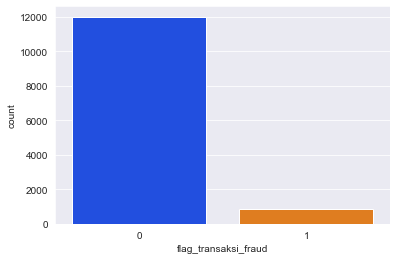

In [231]:
# Melihat keseimbangan dari kolom label
sns.countplot(df['flag_transaksi_fraud'])

In [232]:
fraud = df[df['flag_transaksi_fraud']==1]
not_fraud = df[df["flag_transaksi_fraud"]==0]

In [233]:
print(fraud.shape,not_fraud.shape)

(886, 28) (11999, 28)


Hasil dari kolom label didapatkan bahwa yang terjadi fraud sebesar 886 dan not fraud sebesar 11999. Hal ini tentunya membuat dataset ini **Imbalanced** 
Sebelum membuat model tentunya ada beberapa solusi yang bisa dilakukan terhadap ketidakseimbangan dataset ini yaitu :

1) Random OverSampling

2) Random UnderSampling

3) SMOTE

In [234]:
# Cek apakah data yang missing/null dll
def missing_data(df):
    miss1 = pd.DataFrame(df.isnull().sum()).reset_index()
    miss1.columns = ['columns', 'Num of Miss']
    miss2 = pd.DataFrame(df.isnull().sum()/df.shape[0]*100).reset_index()
    miss2.columns = ['columns', 'Perc of Miss']
    miss = miss1.merge(miss2, how='inner', on='columns')
    return miss[miss['Num of Miss']!=0]
missing_data(df)

columns  Num of Miss  Perc of Miss
23   rata_rata_nilai_transaksi           20      0.155219
24    maksimum_nilai_transaksi           20      0.155219
25     minimum_nilai_transaksi           20      0.155219
26  rata_rata_jumlah_transaksi           20      0.155219

Dari pengecekan dari data yang missing/null didapatkan ada 20 baris yang terjadi null, tentunya hal ini tidak masalah bila di drop dari dataset

In [235]:
# Mengubah kolom rata-rata nilai transaksi dari string ke float64
df['rata_rata_nilai_transaksi']=df['rata_rata_nilai_transaksi'].str.replace(r'\D', '').astype('float64')

In [236]:
# Me-drop data yang missing 
df = df.dropna()

In [237]:
# Melihat unique value dari setiap kolom
df.nunique()

Id                            8675
id_tanggal_transaksi_awal      360
tanggal_transaksi_awal         452
tipe_kartu                      14
id_merchant                   1097
nama_merchant                 1095
tipe_mesin                    5295
tipe_transaksi                  20
nama_transaksi                  20
nilai_transaksi               1408
id_negara                       13
nama_negara                     12
nama_kota                      227
lokasi_mesin                  5758
pemilik_mesin                 1640
waktu_transaksi               7858
kuartal_transaksi                4
kepemilikan_kartu                2
nama_channel                     5
id_channel                       4
flag_transaksi_finansial         1
status_transaksi                 1
bank_pemilik_kartu               1
rata_rata_nilai_transaksi     3075
maksimum_nilai_transaksi       802
minimum_nilai_transaksi        749
rata_rata_jumlah_transaksi     371
flag_transaksi_fraud             2
dtype: int64

In [180]:
numerical_cols = ['nilai_transaksi',
            'rata_rata_nilai_transaksi',
            'maksimum_nilai_transaksi',
            'minimum_nilai_transaksi',
            'rata_rata_jumlah_transaksi']

id_col     = ['Id', 
              'id_tanggal_transaksi_awal',
              'tanggal_transaksi_awal', 
              'id_merchant', 
              'nama_merchant', 
              'tipe_mesin', 
              'id_negara',
              'nama_kota', 
              'lokasi_mesin', 
              'pemilik_mesin', 
              'waktu_transaksi', 
              'nama_negara', 
              'flag_transaksi_finansial',
              'status_transaksi', 
              'bank_pemilik_kartu'] 

binary_cols   = ['kepemilikan_kartu'] #kolom ini hanya ada 2 jenis value, 1 atau 2 kepemilikan kartu

multiple_cols = ['tipe_kartu', 'tipe_transaksi', 'id_channel', 'kuartal_transaksi', 'nama_channel'] 

Pengelompokkan kolom sesuai dengan yang bisa diidentifikasi, yaitu numerical kolom, id kolom, binary kolom dan multiple kolom

In [238]:
# kolom id di drop
df = df.drop(labels = id_col, axis = 1)

In [240]:
# Melihat kembali dataset
df.head()

tipe_kartu  tipe_transaksi  nama_transaksi  nilai_transaksi  \
0         111              26              10        2200000.0   
1         111             156              12        2500000.0   
2           2             156              12        1200000.0   
3         103              58               6         320000.0   
4           0              26              10         150000.0   

   kuartal_transaksi  kepemilikan_kartu  nama_channel  id_channel  \
0                  4                  2             1           9   
1                  2                  1             5           8   
2                  3                  1             5           8   
3                  3                  2             2           4   
4                  3                  2             1           9   

   rata_rata_nilai_transaksi  maksimum_nilai_transaksi  \
0               1.332293e+09                 9750000.0   
1               1.369048e+09                10000000.0   
2               1.552346e+08               100000000.0   
3               7.117647e+09                 6884408.0   
4               6.179683e+08                 2500000.0   

   minimum_nilai_transaksi  rata_rata_jumlah_transaksi  flag_transaksi_fraud  
0                  10000.0                        2.73                     0  
1                  30000.0                        2.33                     1  
2                  41804.0                        2.40                     0  
3                  10000.0                        1.98                     0  
4                 100000.0                        1.46                     0

In [241]:
import pandas_profiling as pp
pp.ProfileReport(df)

Summarize dataset:   0%|          | 0/27 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [242]:
# Terdapat ada baris-baris yang terduplikasi, maka di drop
df = df.drop_duplicates()

In [243]:
df.nunique()

tipe_kartu                      14
tipe_transaksi                  20
nama_transaksi                  20
nilai_transaksi               1408
kuartal_transaksi                4
kepemilikan_kartu                2
nama_channel                     5
id_channel                       4
rata_rata_nilai_transaksi     3075
maksimum_nilai_transaksi       802
minimum_nilai_transaksi        749
rata_rata_jumlah_transaksi     371
flag_transaksi_fraud             2
dtype: int64

kolom tipe_kartu, tipe_transaksi, nama_transaksi akan coba diubah dengan binning

In [244]:
df['tipe_kartu'].unique()

array([111,   2, 103,   0,  93,   4, 104,   5, 138,   1, 132,   3,  24,
        28], dtype=int64)

In [245]:
tipe_kartu = []
for i in df['tipe_kartu']:
    if i <= 10:
        tipe_kartu.append('0')
    if i > 10 and i <= 100:
        tipe_kartu.append('1')
    if i >100 and i <=150:
        tipe_kartu.append('2')

df['tipe_kartu'] = tipe_kartu

In [246]:
df['tipe_transaksi'].unique()

array([ 26, 156,  58, 385, 159, 301, 238, 148, 147, 161, 237, 440, 153,
       227, 433, 471, 640, 160, 158, 526], dtype=int64)

In [247]:
tipe_transaksi = []
for i in df['tipe_transaksi']:
    if i <= 200:
        tipe_transaksi.append('0')
    if i > 200 and i <= 500:
        tipe_transaksi.append('1')
    if i > 500:
        tipe_transaksi.append('2')

df['tipe_transaksi'] = tipe_transaksi

In [248]:
df['nama_transaksi'].unique()

array([10, 12,  6, 11, 19, 16,  9,  5,  3, 17,  4, 15,  2,  1, 14, 13,  8,
        7, 20, 18], dtype=int64)

In [249]:
nama_transaksi = []
for i in df['nama_transaksi']:
    if i <= 9:
        nama_transaksi.append('0')
    if i > 9 and i <= 15:
        nama_transaksi.append('1')
    if i > 15:
        nama_transaksi.append('2')

df['nama_transaksi'] = nama_transaksi

In [251]:
df.nunique()

tipe_kartu                       3
tipe_transaksi                   3
nama_transaksi                   3
nilai_transaksi               1408
kuartal_transaksi                4
kepemilikan_kartu                2
nama_channel                     5
id_channel                       4
rata_rata_nilai_transaksi     3075
maksimum_nilai_transaksi       802
minimum_nilai_transaksi        749
rata_rata_jumlah_transaksi     371
flag_transaksi_fraud             2
dtype: int64

In [252]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12833 entries, 0 to 12884
Data columns (total 13 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tipe_kartu                  12833 non-null  object 
 1   tipe_transaksi              12833 non-null  object 
 2   nama_transaksi              12833 non-null  object 
 3   nilai_transaksi             12833 non-null  float64
 4   kuartal_transaksi           12833 non-null  int64  
 5   kepemilikan_kartu           12833 non-null  int64  
 6   nama_channel                12833 non-null  int64  
 7   id_channel                  12833 non-null  int64  
 8   rata_rata_nilai_transaksi   12833 non-null  float64
 9   maksimum_nilai_transaksi    12833 non-null  float64
 10  minimum_nilai_transaksi     12833 non-null  float64
 11  rata_rata_jumlah_transaksi  12833 non-null  float64
 12  flag_transaksi_fraud        12833 non-null  int64  
dtypes: float64(5), int64(5), object

## Data Modelling

In [253]:
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split, cross_val_score

In [254]:
# memisahkan menjadi variabel X dan y
X = df.drop('flag_transaksi_fraud', axis=1)
y = df['flag_transaksi_fraud']

In [255]:
# variabel X di scaling dengan Power Transformer
from sklearn.preprocessing import PowerTransformer
scaler=PowerTransformer()
X = scaler.fit_transform(X)

Power transforms are a family of parametric, monotonic transformations that are applied to make data more Gaussian-like. This is useful for modeling issues related to heteroscedasticity (non-constant variance), or other situations where normality is desired.

https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PowerTransformer.html

In [256]:
X = pd.DataFrame(X)

In [257]:
# Dari hasil visualisasi diatas bahwa data ini imbalanced, maka dipilih menggunakan Random Under Sampler untuk mengatasinya
from imblearn.under_sampling import RandomUnderSampler

rus = RandomUnderSampler(random_state=42, replacement=True)# fit predictor and target variable
X_rus, y_rus = rus.fit_resample(X, y)

In [258]:
from collections import Counter
print('original dataset shape:', Counter(y))
print('Resample dataset shape', Counter(y_rus))

original dataset shape: Counter({0: 11962, 1: 871})
Resample dataset shape Counter({0: 871, 1: 871})


In [259]:
X_train, X_test, y_train, y_test = train_test_split(X_rus,y_rus,test_size = 0.25,random_state = 42)

Counter({0: 11962, 1: 871})


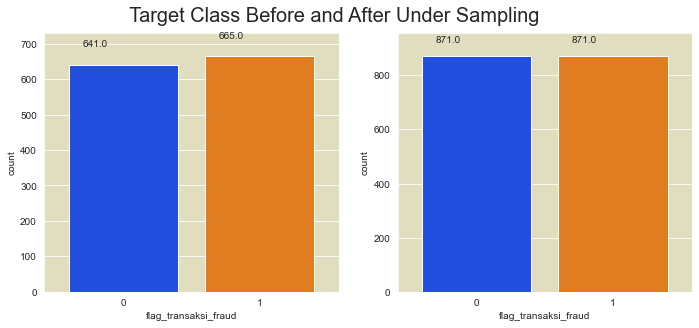

In [260]:
print(Counter(y))
fig, (ax1, ax2) = plt.subplots(1, 2,figsize=(10,4.5))
fig.subplots_adjust(bottom=0.10, left=0.10, top = 0.900, right=1.00)
fig.suptitle(' Target Class Before and After Under Sampling', fontsize = 20)
sns.set_palette("bright")
sns.countplot(y_train, ax=ax1)
ax1.margins(0.1)
ax1.set_facecolor("#e1ddbf")
for p in ax1.patches:
        ax1.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.1, p.get_height()+50))
sns.set_palette("bright")
sns.countplot(y_rus, ax=ax2)
ax2.margins(0.1)
ax2.set_facecolor("#e1ddbf")
for p in ax2.patches:
        ax2.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.1, p.get_height()+50))
sns.set_style('dark')

Dalam pembuatan model klasifikasi ini tentunya memakai confussion matrix, dimana terdapat perbandingan antara predicted label dengan actual label. Khususnya dalam kasus fraud detection ini, tentunya yang berbahaya adalah di ruang False Negative, yang diartikan sebagai Diprediksi tidak fraud, namun secara actual nya terjadi fraud, hal ini berbahaya bagi Bank DiRumahAja terhadap fraud detection ini.

Untuk itu, yang menjadi fokusan dalam modelling ini adalah mencari :

1) Recall class 'yes' atau 1 maksimal

2) Precision pada class 'no' atau 0 maksimal

### XGBOOST

In [263]:
from xgboost import XGBRFClassifier
from sklearn.metrics import classification_report, plot_confusion_matrix, confusion_matrix
xgb_fit = XGBRFClassifier(random_state=42).fit(X_train, y_train)

pred_xgb = xgb_fit.predict(X_test)

[21:19:57] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


              precision    recall  f1-score   support

           0       0.75      0.83      0.79       230
           1       0.79      0.68      0.73       206

    accuracy                           0.76       436
   macro avg       0.77      0.76      0.76       436
weighted avg       0.77      0.76      0.76       436



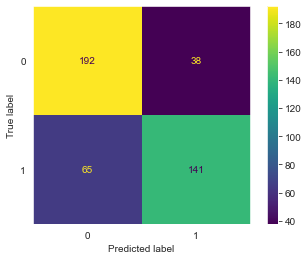

In [264]:
print(classification_report(y_test, pred_xgb))

plot_confusion_matrix(estimator=xgb_fit, X = X_test, y_true = y_test, values_format = '');
plt.grid(False)

In [265]:
recall1_xgb = 0.68
precision0_xgb = 0.75
accuracy_xgb = 0.76

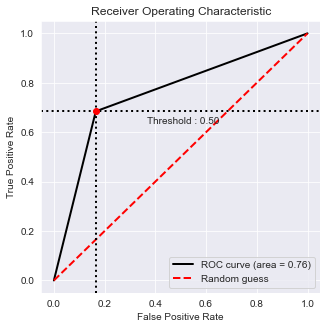

In [266]:
from plot_metric.functions import BinaryClassification
# Visualisation with plot_metric
bc = BinaryClassification(y_test, pred_xgb, labels=["Class 0", "Class 1"])

# Figures
plt.figure(figsize=(5,5))
bc.plot_roc_curve()
plt.show()

In [267]:
# What features contribute the most?
features_importances = pd.DataFrame({'Features': X_rus.columns, 
                                     'Score':xgb_fit.feature_importances_}).sort_values(by ='Score', 
                                                                                                   ascending = False)
features_importances.head()

Features     Score
5          5  0.539657
6          6  0.244289
3          3  0.044128
7          7  0.041078
11        11  0.025357

In [268]:
sns.barplot(x = 'Features', y ='Score', data = features_importances[:10]);
plt.xticks(rotation = 45)
plt.title('Characteristics That Affect Customer Decision\non Product Purchase');

In [269]:
# import models
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

In [270]:
# models
rf = RandomForestClassifier(random_state=42)
svm = SVC(random_state=42)
lr = LogisticRegression(random_state=42)
dt = DecisionTreeClassifier(random_state=42)
knn = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
nb = GaussianNB()

In [271]:
# modeling
models = [rf, svm, lr, dt, knn, nb]

for model in models:
    model.fit(X_train, y_train)

In [272]:
# Evaluation
ypred_rf = rf.predict(X_test)
ypred_svm = svm.predict(X_test)
ypred_lr = lr.predict(X_test)
ypred_dt = dt.predict(X_test)
ypred_knn = knn.predict(X_test)
ypred_nb = nb.predict(X_test)

## Random Forest Classifier

              precision    recall  f1-score   support

           0       0.78      0.85      0.81       230
           1       0.81      0.74      0.77       206

    accuracy                           0.80       436
   macro avg       0.80      0.79      0.79       436
weighted avg       0.80      0.80      0.79       436



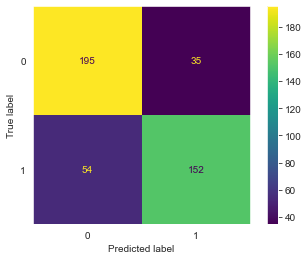

In [273]:
print(classification_report(y_test, ypred_rf))
plot_confusion_matrix(estimator=rf, X = X_test, y_true = y_test, values_format = '');
plt.grid(False)

In [296]:
recall1_rf = 0.74
precision0_rf = 0.78
accuracy_rf = 0.8

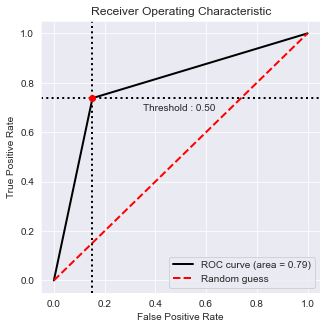

In [275]:
from plot_metric.functions import BinaryClassification
# Visualisation with plot_metric
bc = BinaryClassification(y_test, ypred_rf, labels=["Class 0", "Class 1"])

# Figures
plt.figure(figsize=(5,5))
bc.plot_roc_curve()
plt.show()

In [276]:
# What features contribute the most?
features_importances = pd.DataFrame({'Features': X_rus.columns, 
                                     'Score':rf.feature_importances_}).sort_values(by = 'Score', ascending = False)
features_importances.head()

Features     Score
3          3  0.162802
11        11  0.148239
9          9  0.128932
8          8  0.128396
10        10  0.124351

In [277]:
sns.barplot(x = 'Features', y ='Score', data = features_importances[:10]);
plt.xticks(rotation = 45)
plt.title('Characteristics That Affect Customer Decision\non Product Purchase');

## Support Vector Machine

In [278]:
print(classification_report(y_test, ypred_svm))
plot_confusion_matrix(estimator=svm, X = X_test, y_true = y_test, values_format = '');
plt.grid(False)

              precision    recall  f1-score   support

           0       0.73      0.85      0.79       230
           1       0.80      0.65      0.72       206

    accuracy                           0.76       436
   macro avg       0.76      0.75      0.75       436
weighted avg       0.76      0.76      0.75       436



In [279]:
recall1_svm = 0.65
precision0_svm = 0.73
accuracy_svm = 0.76

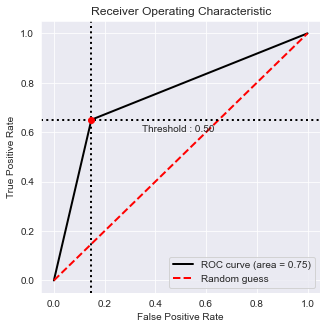

In [280]:
from plot_metric.functions import BinaryClassification
# Visualisation with plot_metric
bc = BinaryClassification(y_test, ypred_svm, labels=["Class 0", "Class 1"])

# Figures
plt.figure(figsize=(5,5))
bc.plot_roc_curve()
plt.show()

## Logistic Regression

              precision    recall  f1-score   support

           0       0.74      0.80      0.77       230
           1       0.76      0.68      0.72       206

    accuracy                           0.75       436
   macro avg       0.75      0.74      0.75       436
weighted avg       0.75      0.75      0.75       436



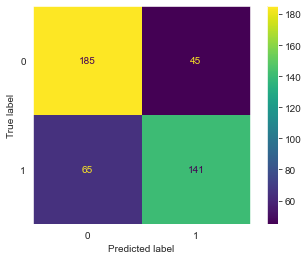

In [281]:
print(classification_report(y_test, ypred_lr))
plot_confusion_matrix(estimator=lr, X = X_test, y_true = y_test, values_format = '');
plt.grid(False)

In [282]:
recall1_lr = 0.68
precision0_lr = 0.74
accuracy_lr = 0.75

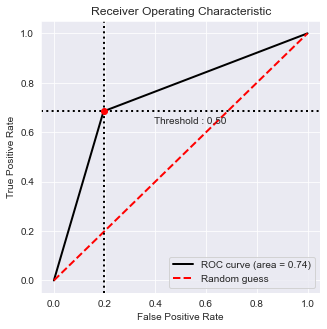

In [283]:
from plot_metric.functions import BinaryClassification
# Visualisation with plot_metric
bc = BinaryClassification(y_test, ypred_lr, labels=["Class 0", "Class 1"])

# Figures
plt.figure(figsize=(5,5))
bc.plot_roc_curve()
plt.show()

## Decision Tree Classifier

              precision    recall  f1-score   support

           0       0.70      0.67      0.68       230
           1       0.65      0.68      0.66       206

    accuracy                           0.67       436
   macro avg       0.67      0.67      0.67       436
weighted avg       0.67      0.67      0.67       436



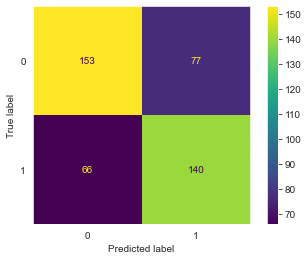

In [284]:
print(classification_report(y_test, ypred_dt))
plot_confusion_matrix(estimator=dt, X = X_test, y_true = y_test, values_format = '');
plt.grid(False)

In [285]:
recall1_dt = 0.68
precision0_dt = 0.7
accuracy_dt = 0.67

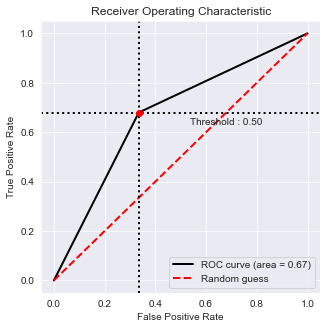

In [286]:
from plot_metric.functions import BinaryClassification
# Visualisation with plot_metric
bc = BinaryClassification(y_test, ypred_dt, labels=["Class 0", "Class 1"])

# Figures
plt.figure(figsize=(5,5))
bc.plot_roc_curve()
plt.show()

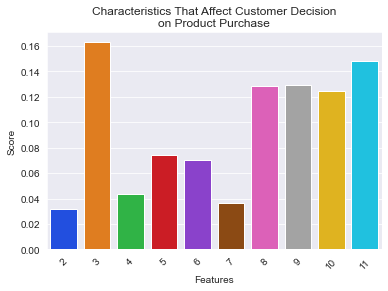

In [287]:
sns.barplot(x = 'Features', y ='Score', data = features_importances[:10]);
plt.xticks(rotation = 45)
plt.title('Characteristics That Affect Customer Decision\non Product Purchase');

## K-Nearest Neighbor

              precision    recall  f1-score   support

           0       0.72      0.77      0.74       230
           1       0.72      0.66      0.69       206

    accuracy                           0.72       436
   macro avg       0.72      0.72      0.72       436
weighted avg       0.72      0.72      0.72       436



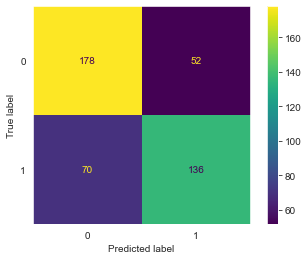

In [288]:
print(classification_report(y_test, ypred_knn))
plot_confusion_matrix(estimator=knn, X = X_test, y_true = y_test, values_format = '');
plt.grid(False)

In [289]:
recall1_knn = 0.66
precision0_knn = 0.72
accuracy_dt = 0.72

In [290]:
from plot_metric.functions import BinaryClassification
# Visualisation with plot_metric
bc = BinaryClassification(y_test, ypred_knn, labels=["Class 0", "Class 1"])

# Figures
plt.figure(figsize=(5,5))
bc.plot_roc_curve()
plt.show()

## Naive Bayes

In [291]:
print(classification_report(y_test, ypred_nb))
plot_confusion_matrix(estimator=nb, X = X_test, y_true = y_test, values_format = '');
plt.grid(False)

              precision    recall  f1-score   support

           0       0.66      0.92      0.77       230
           1       0.84      0.47      0.60       206

    accuracy                           0.71       436
   macro avg       0.75      0.69      0.68       436
weighted avg       0.75      0.71      0.69       436



In [292]:
recall1_nb = 0.47
precision0_nb = 0.66
accuracy_nb = 0.71

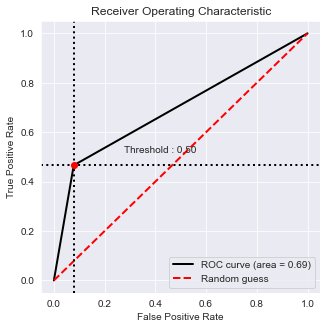

In [293]:
from plot_metric.functions import BinaryClassification
# Visualisation with plot_metric
bc = BinaryClassification(y_test, ypred_nb, labels=["Class 0", "Class 1"])

# Figures
plt.figure(figsize=(5,5))
bc.plot_roc_curve()
plt.show()

## Hyperparameter Tuning

In [226]:
model_params = {
    'svm': {
        'model': SVC(),
        'params' : {
            'C' : [1.0, 2.0, 4.0, 6.0, 8.0, 10.0],
            'kernel': ['rbf'],
            'gamma' : ['scale', 'auto']
        }  
    },
    'random_forest': {
        'model': RandomForestClassifier(),
        'params' : {
            'n_estimators': [i for i in range(1,100,5)],
            'criterion' : ['gini', 'entropy'],
            'max_features' : ['auto', 'sqrt', 'log2'],
            'n_jobs' : [-1]
        }
    },
    'logistic_regression' : {
        'model': LogisticRegression(),
        'params': {
            'C': [1.0, 2.0, 4.0, 6.0, 8.0, 10.0],
            'penalty' : ['l1', 'l2', 'elasticnet'],
            'solver' : ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
            'multi_class' : ['auto', 'ovr', 'multinomial'],
            'n_jobs' : [-1]
        }
    }
}

In [114]:
#import gridsearch
from sklearn.model_selection import GridSearchCV
scores = []

for model_name, mp in model_params.items():
    clf =  GridSearchCV(mp['model'], mp['params'], cv=5, return_train_score=False)
    clf.fit(X_train, y_train)
    scores.append({
        'model': model_name,
        'best_score': clf.best_score_,
        'best_params': clf.best_params_
    })
    
df_param = pd.DataFrame(scores,columns=['model','best_score','best_params'])
df_param

model  best_score  \
0                  svm    0.741953   
1        random_forest    0.758799   
2  logistic_regression    0.748843   

                                         best_params  
0      {'C': 1.0, 'gamma': 'scale', 'kernel': 'rbf'}  
1  {'criterion': 'gini', 'max_features': 'sqrt', ...  
2  {'C': 1.0, 'multi_class': 'auto', 'n_jobs': -1...

In [115]:
df_param['best_params'][1]

{'criterion': 'gini', 'max_features': 'sqrt', 'n_estimators': 96, 'n_jobs': -1}

In [116]:
model2 = RandomForestClassifier(criterion='gini', max_features='sqrt', n_estimators = 96, n_jobs= -1)

In [118]:
model2.fit(X_train, y_train)

RandomForestClassifier(max_features='sqrt', n_estimators=96, n_jobs=-1)

In [119]:
y_test_pred_model2 = model2.predict(X_test)
y_train_pred_model2 =model2.predict(X_train)

from sklearn.metrics import accuracy_score
modelsvc_acc = accuracy_score(y_test_pred_model2,y_test)

print("Train Set Accuracy:"+str(accuracy_score(y_train_pred_model2,y_train)*100))
print("Test Set Accuracy:"+str(accuracy_score(y_test_pred_model2,y_test)*100))
print("\nConfusion Matrix:\n%s"%confusion_matrix(y_test_pred_model2,y_test))
print("\nClassification Report:\n%s"%classification_report(y_test_pred_model2,y_test))

Train Set Accuracy:100.0
Test Set Accuracy:78.21100917431193

Confusion Matrix:
[[192  57]
 [ 38 149]]

Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.77      0.80       249
           1       0.72      0.80      0.76       187

    accuracy                           0.78       436
   macro avg       0.78      0.78      0.78       436
weighted avg       0.79      0.78      0.78       436



              precision    recall  f1-score   support

           0       0.77      0.83      0.80       230
           1       0.80      0.72      0.76       206

    accuracy                           0.78       436
   macro avg       0.78      0.78      0.78       436
weighted avg       0.78      0.78      0.78       436



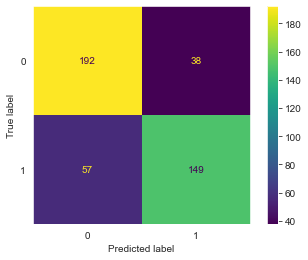

In [120]:
print(classification_report(y_test, y_test_pred_model2))
plot_confusion_matrix(estimator=model2, X = X_test, y_true = y_test, values_format = '');
plt.grid(False)

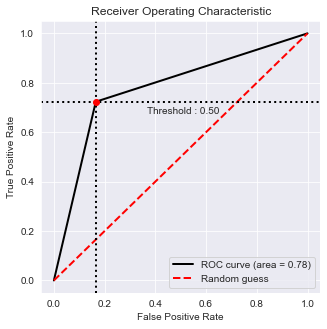

In [121]:
from plot_metric.functions import BinaryClassification
# Visualisation with plot_metric
bc = BinaryClassification(y_test, y_test_pred_model2, labels=["Class 0", "Class 1"])

# Figures
plt.figure(figsize=(5,5))
bc.plot_roc_curve()
plt.show()

              precision    recall  f1-score   support

           0       0.78      0.85      0.81       230
           1       0.81      0.74      0.77       206

    accuracy                           0.80       436
   macro avg       0.80      0.79      0.79       436
weighted avg       0.80      0.80      0.79       436



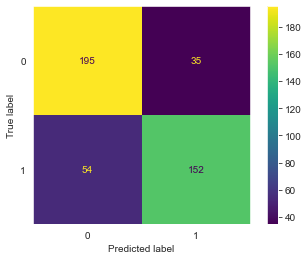

In [122]:
print(classification_report(y_test, ypred_rf))
plot_confusion_matrix(estimator=rf, X = X_test, y_true = y_test, values_format = '');
plt.grid(False)

In [124]:
df_param['best_params'][0]

{'C': 1.0, 'gamma': 'scale', 'kernel': 'rbf'}

In [125]:
model = SVC(C=1.0, gamma ='scale', kernel = 'rbf')

In [126]:
model.fit(X_train, y_train)

SVC()

In [127]:
y_test_pred_model = model.predict(X_test)
y_train_pred_model =model.predict(X_train)

from sklearn.metrics import accuracy_score
modelsvc_acc=accuracy_score(y_test_pred_model,y_test)

print("Train Set Accuracy:"+str(accuracy_score(y_train_pred_model,y_train)*100))
print("Test Set Accuracy:"+str(accuracy_score(y_test_pred_model,y_test)*100))
print("\nConfusion Matrix:\n%s"%confusion_matrix(y_test_pred_model,y_test))
print("\nClassification Report:\n%s"%classification_report(y_test_pred_model,y_test))

Train Set Accuracy:77.947932618683
Test Set Accuracy:75.68807339449542

Confusion Matrix:
[[196  72]
 [ 34 134]]

Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.73      0.79       268
           1       0.65      0.80      0.72       168

    accuracy                           0.76       436
   macro avg       0.75      0.76      0.75       436
weighted avg       0.77      0.76      0.76       436



              precision    recall  f1-score   support

           0       0.73      0.85      0.79       230
           1       0.80      0.65      0.72       206

    accuracy                           0.76       436
   macro avg       0.76      0.75      0.75       436
weighted avg       0.76      0.76      0.75       436



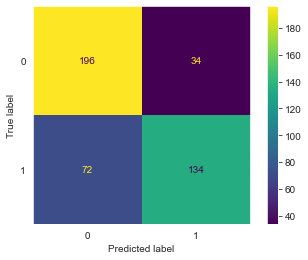

In [128]:
print(classification_report(y_test, y_test_pred_model))
plot_confusion_matrix(estimator=model, X = X_test, y_true = y_test, values_format = '');
plt.grid(False)

## Kesimpulan

Dari hasil pemodelan dari beberapa modelling yang sudah dilakukan serta melakukan hyperparameter tuning maka didapatkan model terbaik yaitu di Random Forest Classifier, bahkan walaupun melakukan hyperparameter tuning juga tidak menaikkan nilai recall 1, precision 0 dan accuracy.

oleh sebab itu **Random Forest Classifier** menjadi model yang terbaik

In [297]:
print('Recall 1 =', recall1_rf)
print('Precision 0 =', precision0_rf)
print('Accuracy =', accuracy_rf)

Recall 1 = 0.74
Precision 0 = 0.78
Accuracy = 0.8


## Saran
Dengan keterbatasan saya dalam mempelajari pengolahan data, tentunya notebook ini masih bisa ditingkatkan lagi nilai Recall1, Precision0, dan Accuracy dengan :

1) Data Pre-Processing yang lebih baik lagi, mungkin masih ada kolom-kolom yang tentunya masih bisa terpakai dalam modelling

2) Hubungan Korelasi kolom-kolom yang tentunya sangat terkait dengan kolom label